# Project : Investigate Movie Data

##  Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>
    

<a id = "intro"></a>
## Introduction

> For this **Project** We have chosen the *TMDb data* or *The Movies Database* obtained from *Kaggle*. This data set contains information about 10,000 movies including their User ratings and revenue.

><p> The questions that we will attempt to answer are :
    
    1.  which movie has earned the most?
    2. What type of relation does runtime, vote count and vote average have with each other?
    3.  For production of a movie does high budget result in high revenue?
</p>
    
> We will now import the necessary packages and load the data    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('tmdb-movies.csv')

<a id = "wrangling"></a>
## Data Wrangling


> <p>We will now check if there is any missing data in the data file</p> 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> <p> We can clearly see that there are many columns with missing data. The number of values should be 10866  for every column yet there are some which have less than the required 10866 values.</p>

> <p>We can also see that the coulmns with missing data are of type object. If these are of type string then there is no need to fill the missing places.</p>

In [15]:
# to fill the empty places
df.fillna(df.mean(), inplace= True)

In [16]:
# to check that there are no empty places left
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#check for duplicates in data
sum(df.duplicated())

1

In [10]:
# to remove the duplicate from the file
df.drop_duplicates(inplace=True)

In [11]:
# to check that the duplicate has been removed
sum(df.duplicated())

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

> After removal of the duplicate file the total number of rows should be 10865 but as we can clearly see there are still some columns having less than 10865 rows in them. 
> Because these columns have string type data we cannot fill the empty places in these columns.

> We have finished **Wrangling** or **Cleaning** the data.

 <a id = "eda"></a>
    
## Exploratory Data Analysis

<br>


> We will now check how different column-entities affect other column-entities with the use of graphs.

<br>
<br>

In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [16]:
df['revenue'].max()

2781505847

In [22]:
df.loc[df['revenue'].idxmax()]

id                                                                  19995
imdb_id                                                         tt0499549
popularity                                                        9.43277
budget                                                          237000000
revenue                                                        2781505847
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
homepage                                      http://www.avatarmovie.com/
director                                                    James Cameron
tagline                                       Enter the World of Pandora.
keywords                culture clash|future|space war|space colony|so...
overview                In the 22nd century, a paraplegic Marine is di...
runtime                                                               162
genres                           Actio

> we have found that the highest earning movie is Avatar released on 12/10/09 having 8458 votes with an average vote value of 7.1.

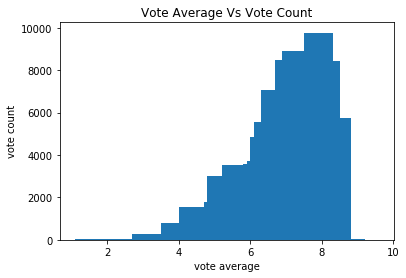

In [29]:
count = df['vote_count']
avg = df['vote_average']
plt.bar(avg, count)
plt.title('Vote Average Vs Vote Count')
plt.xlabel('vote average')
plt.ylabel('vote count')
plt.show()


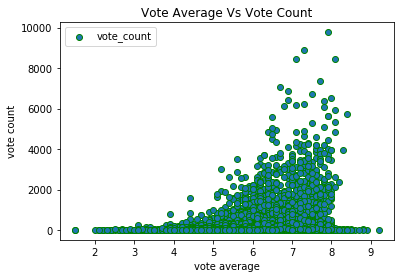

In [28]:
count = df['vote_count']
avg = df['vote_average']
plt.scatter(avg, count, edgecolors='g')
plt.title('Vote Average Vs Vote Count')
plt.xlabel('vote average')
plt.ylabel('vote count')
plt.legend(loc = 2, prop={'size': 10})
plt.show()

> From the above graphs we can see that the maximum number of votes result in an average vote having value between 6.7 and 7.5

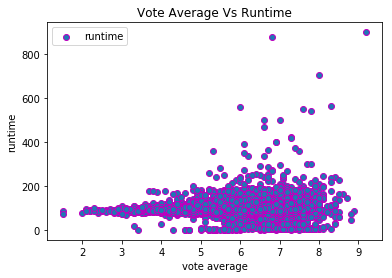

In [30]:
rtime = df['runtime']
avg = df['vote_average']
plt.scatter(avg, rtime, edgecolors='m')
plt.title('Vote Average Vs Runtime')
plt.xlabel('vote average')
plt.ylabel('runtime')
plt.legend(loc = 2, prop={'size': 10})
plt.show()

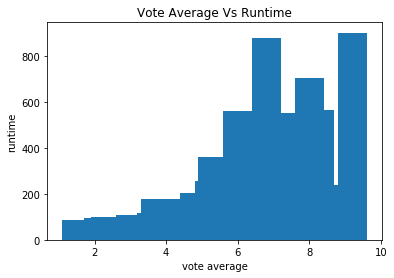

In [7]:
rtime = df['runtime']
avg = df['vote_average']
plt.bar(avg, rtime)
plt.xlabel('vote average')
plt.ylabel('runtime')
plt.title('Vote Average Vs Runtime')
plt.show()

> From the above graphs we can easily infer that the average vote value is higher when the runtime of the movie is above 750 minutes at the very least.

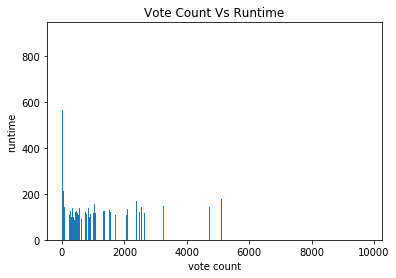

In [8]:
count = df['vote_count']
rtime = df['runtime']
plt.bar(count, rtime)
plt.ylabel('runtime')
plt.xlabel('vote count')
plt.title('Vote Count Vs Runtime')
plt.show()

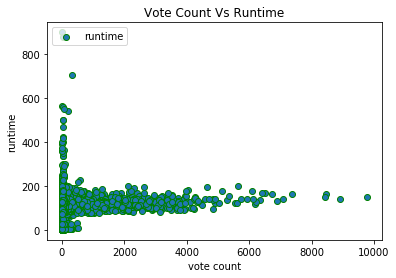

In [31]:
count = df['vote_count']
runtime = df['runtime']
plt.scatter(count, runtime, edgecolors = 'g')
plt.title('Vote Count Vs Runtime')
plt.ylabel('runtime')
plt.xlabel('vote count')
plt.legend(loc = 2, prop={'size': 10})
plt.show()

> We infer from the above two graphs that vote count is maximum for movies having less than 200 and more than 100 minutes of runtime.

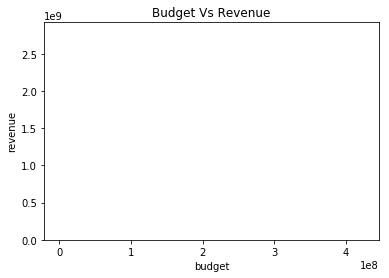

In [37]:
budget = df['budget']
revenue = df['revenue']
plt.bar(budget, revenue)
plt.ylabel('revenue')
plt.xlabel('budget')
plt.title('Budget Vs Revenue')
plt.show()

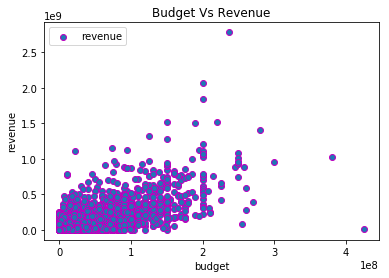

In [36]:
budget = df['budget']
revenue = df['revenue']
plt.scatter(budget, revenue, edgecolors = 'm')
plt.title('Budget Vs Revenue')
plt.xlabel('budget')
plt.ylabel('revenue')
plt.legend(loc = 2, prop={'size': 10})
plt.show()

> We infer from the above graphs that revenue is maximum when average vote is between 6 and 8.

<a id="conclusions"></a>
## Conclusions

> Now we will answer the questions given below :
    
    1.   1.  which movie has earned the most?
   >  we have found that the highest earning movie is Avatar released on 12/10/09 having 8458 votes with an average vote value of 7.1  
   
    2. what type of relation does runtime, vote count and vote average have with each other?
  > Yes, we have found that vote count is high when runtime is between 100 and 200 minutes and vote average is maximum when     runtime is above 750 minutes and vote count is maximum when vote average is between 6.7 and 7.5
   
    3.  For production of a movie does high budget result in high revenue?
   > No, from the graph we find that when the budget is maximum the revenue is minimum hence for a movie high budget does not mean high revenue. 

#### Limitations of data

1. There are a lot of missing values in the data including null value and zeroes.
2. The dataset is not able to represent the population properly.
3. There are a lot of zeroes in budget and revenue columns which should not be accounted when using visual representation.


> NOTE: no help was taken from any outside source.

